## Exercise 2-1, 2-4

### Taniya Adhikari
#### DSC530

In [8]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import thinkplot
import thinkstats2

import nsfg
import first

In [17]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

Before plotting the ages, I'll apply `floor` to round down:

In [19]:
ages = np.floor(live.agepreg)

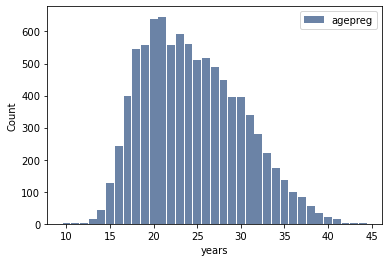

In [20]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

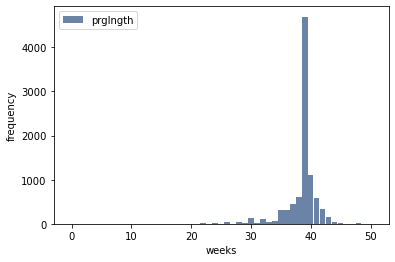

In [21]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='weeks', ylabel='frequency')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [22]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


Use `Largest` to display the longest pregnancy lengths.

In [23]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [24]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

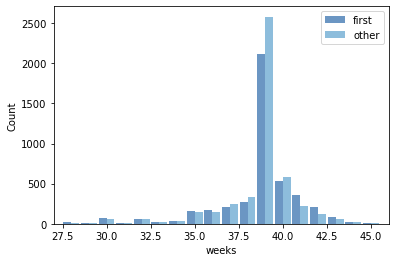

In [25]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [26]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [27]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [30]:
if var == std*std:
    print("Yes it is!")
else:
    print("Oops!")

Yes it is!


Here's are the mean pregnancy lengths for first babies and others:

In [31]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [32]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

## Answer 2-1  
Since the length time varies between 27 weeks to 46 weeks and the effect size .078 weeks is not the best way to reassure an anxious patient. I would use standard deviation as an explanation for anxious patient that it's normal for babies to be late 2-3 weeks.  
For the news story, it has to be little sensational, so I would use mean value, and explain that on average first time pregnancies or pregnancies in general can last upto 38-39 weeks, and in extreme cases can last upto 45 weeks.  
  
  
**The Straight Dope**  
     
First time parents are usually anxious about their first baby arrival. People are usually curious whether first babies tend to come late or early. So there is no right or wrong answers with baby's birth. Sometimes babies come prematurly, sometimes they arrive on time and sometimes very late. It all depends, but looking into the analysis of NSFG data it seems like it's normal for babies to be 2-3 weeks late (std 2.7). On average first time pregnancies can last up 38-39 weeks. But that is not because it is first time, pregnancies after first time also can last upto 38-39 weeks. the effect size between the two sample, (first time and others) were relatively small 0.78 weeks, So whether it's a first time baby or second time, it does not matter. 

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [33]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [34]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

**Exercises**

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [35]:
firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [36]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

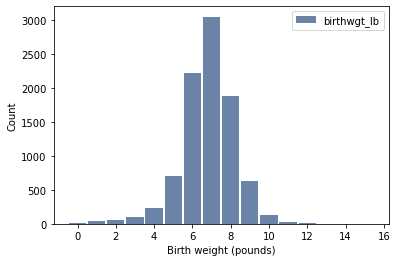

In [18]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

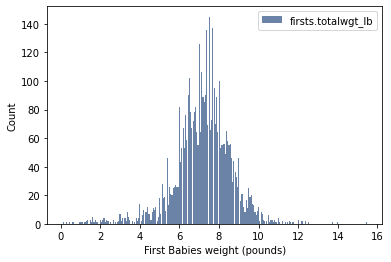

In [37]:
hist = thinkstats2.Hist(firsts.totalwgt_lb, label='firsts.totalwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='First Babies weight (pounds)', ylabel='Count')

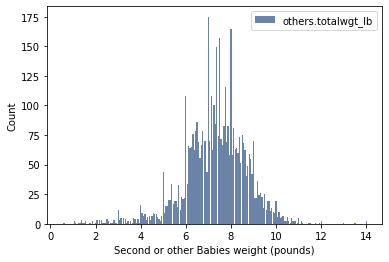

In [38]:
hist = thinkstats2.Hist(others.totalwgt_lb, label='others.totalwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Second or other Babies weight (pounds)', ylabel='Count')

## Answer 2-1  
              
By looking at above graphs of all babies, first babies and other babies, it seems like data is approximately normal, or it is has a very little skewness. The mean for both categories are fairly close first-time(7.20) and others(7.32) with effect size of -.12 and Cohens'sd value is also -0.08 shows that there isn't significant evidence to conclude that first time babies are heavier or lighter than the others group.